1. 전체주석처리된 코드셀은 전혀 보지 않아도 됨. 파일경로는 내 로컬환경에서 가져온게 많으므로 신경안써도 됨. 

2. 보면 다양한 모델을 만들었는데, 이전의 모델에서 사용한 train,test를 그대로 쓰기도 하고 체계가 좀 다양해서 코드셀만 봐서는 깔끔하지 않을 수 있음. 필요할시 얘기하면 각 모델별 정확히 어떤 변수 어떤기법을 사용했나 정리하겠음. 현재 마크다운으로 간략히 표시는 해둠. 

3. **가장 중요한 내용은 (3)결과분석및 모델결정 파트.**
거기에 최종적인 분석내용 정리도 써있으니 발표를 위해 핵심만 보려거든 그쪽 위주로. 

In [2]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc
import shap
import joblib
import xgboost as xgb


데이터셋 경로

In [3]:
default_path = '../../jiyoon/asset/default/mhcld_puf_2022.csv'
processed1_path = '../../jiyoon/asset/prepro3/단순결측치 행만 추출.csv'
processed2_path = '../../jiyoon/asset/prepro3/단순결측치 행 제거.csv'
processed3_path = '../../jiyoon/asset/prepro3/단순결측치 행 제거 후 지역별 차이 있는 칼럼 제거.csv'
processed4_path = '../../jiyoon/asset/prepro3/결측치가 포함된 모든 행 제거.csv'
processed5_path = '../../jiyoon/asset/prepro3/원핫인코딩_결측치가 포함된 모든 행 제거.csv'
processed6_path = '../../jiyoon/asset/prepro3/원핫인코딩_단순결측치 행 제거 후 지역별 차이 있는 칼럼 제거.csv'


In [ ]:
# default = pd.read_csv(default_path)
# processed1 = pd.read_csv(processed1_path)
# processed2 = pd.read_csv(processed2_path)
# processed3 = pd.read_csv(processed3_path)
# processed4 = pd.read_csv(processed4_path)
# processed5 = pd.read_csv(processed5_path)
# processed6 = pd.read_csv(processed6_path)


In [ ]:
# print(default.shape)
# print(processed1.shape)
# print(processed2.shape)
# print(processed3.shape)
# print(processed4.shape)
# print(processed5.shape)
# print(processed6.shape)

(6957919, 40)
(1640309, 40)
(5317610, 40)
(5317610, 35)
(1147781, 40)
(1147781, 77)
(5317610, 69)


In [ ]:
# default.describe(include='all')

,YEAR,AGE,EDUC,ETHNIC,RACE,GENDER,SPHSERVICE,CMPSERVICE,OPISERVICE,RTCSERVICE,...,ODDFLG,PDDFLG,PERSONFLG,SCHIZOFLG,ALCSUBFLG,OTHERDISFLG,STATEFIP,DIVISION,REGION,CASEID
count,6957919.0,6.957919e+06,6.957919e+06,6.957919e+06,6.957919e+06,6.957919e+06,6.957919e+06,6.957919e+06,6.957919e+06,6.957919e+06,...,6.957919e+06,6.957919e+06,6.957919e+06,6.957919e+06,6.957919e+06,6.957919e+06,6.957919e+06,6.957919e+06,6.957919e+06,6.957919e+06
mean,2022.0,6.906807e+00,-2.893766e+00,1.930815e+00,2.941775e+00,1.509873e+00,1.983040e+00,1.029606e+00,1.956536e+00,1.989749e+00,...,2.131284e-02,1.593882e-02,2.298906e-02,1.065296e-01,5.158568e-02,1.265233e-01,2.766003e+01,5.462245e+00,2.740285e+00,2.022348e+10
std,0.0,4.054777e+00,6.287160e+00,4.495802e+00,4.548226e+00,7.047036e-01,1.291224e-01,1.694973e-01,2.038982e-01,1.007286e-01,...,1.444251e-01,1.252389e-01,1.498685e-01,3.085142e-01,2.211891e-01,3.324382e-01,1.597620e+01,2.517557e+00,1.069379e+00,2.008578e+06
min,2022.0,-9.000000e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.022000e+10
25%,2022.0,3.000000e+00,-9.000000e+00,3.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01,3.000000e+00,2.000000e+00,2.022174e+10
50%,2022.0,7.000000e+00,-9.000000e+00,4.000000e+00,5.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.700000e+01,5.000000e+00,3.000000e+00,2.022348e+10
75%,2022.0,1.000000e+01,4.000000e+00,4.000000e+00,5.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.200000e+01,8.000000e+00,4.000000e+00,2.022522e+10
max,2022.0,1.400000e+01,5.000000e+00,4.000000e+00,6.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.900000e+01,9.000000e+00,4.000000e+00,2.022696e+10


In [ ]:
# # 전처리 분석
# def describe_dataframes(dfs):
#     for name, df in dfs.items():
#         print(f"{name} Data Shape: {df.shape}")
#         for col in df.columns:
#             print(f"{col}: {df[col].unique()}")
#         print("\n\n\n")

# dataframes = {
#     'Default': default,
#     'Processed1': processed1,
#     'Processed2': processed2,
#     'Processed3': processed3,
#     'Processed4': processed4,
#     'Processed5': processed5,
#     'Processed6': processed6
# }

# describe_dataframes(dataframes)

Default Data Shape: (6957919, 40)
YEAR: [2022]
AGE: [14  7  8  3  4  6  5 11  9  1 12 13  2 10 -9]
EDUC: [-9  3  4  2  5  1]
ETHNIC: [ 3  4  1  2 -9]
RACE: [ 3  4 -9  2  6  5  1]
GENDER: [ 2  1 -9]
SPHSERVICE: [2 1]
CMPSERVICE: [1 2]
OPISERVICE: [2 1]
RTCSERVICE: [2 1]
IJSSERVICE: [2 1]
MH1: [11  7 -9  6 13  5  1  2  3  8  4 10  9 12]
MH2: [-9 11  2  1  3 13  7  8 10  6  5  9  4 12]
MH3: [-9  2  7  1  4  8 11 10  9  3 13  5 12  6]
SUB: [-9  6  8  3 11  4  5 10  9 13 12  7  1  2]
MARSTAT: [ 1  2  4 -9  3]
SMISED: [-9  1  3  2]
SAP: [-9  1  2]
EMPLOY: [-9  4  5  1  2  3]
DETNLF: [-9  1  2  5  3  4]
VETERAN: [-9  2  1]
LIVARAG: [-9  2  3  1]
NUMMHS: [1 2 0 3]
TRAUSTREFLG: [0 1]
ANXIETYFLG: [0 1]
ADHDFLG: [0 1]
CONDUCTFLG: [0 1]
DELIRDEMFLG: [0 1]
BIPOLARFLG: [0 1]
DEPRESSFLG: [0 1]
ODDFLG: [0 1]
PDDFLG: [0 1]
PERSONFLG: [0 1]
SCHIZOFLG: [1 0]
ALCSUBFLG: [0 1]
OTHERDISFLG: [0 1]
STATEFIP: [ 1  2  4  5  6  8  9 10 11 12 13 15 16 17 18 19 20 21 22 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 3

In [ ]:
# default.columns
# processed1.columns
# processed2.columns
# processed3.columns
# processed4.columns
# processed5.columns
# processed6.columns

Index(['YEAR', 'AGE', 'GENDER', 'SPHSERVICE', 'CMPSERVICE', 'OPISERVICE',
       'RTCSERVICE', 'IJSSERVICE', 'MH1', 'MH2', 'MH3', 'SAP', 'NUMMHS',
       'TRAUSTREFLG', 'ANXIETYFLG', 'ADHDFLG', 'CONDUCTFLG', 'DELIRDEMFLG',
       'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG', 'PDDFLG', 'PERSONFLG',
       'SCHIZOFLG', 'ALCSUBFLG', 'OTHERDISFLG', 'STATEFIP', 'CASEID', 'RACE_2',
       'RACE_3', 'RACE_4', 'RACE_5', 'RACE_6', 'ETHNIC_2', 'ETHNIC_3',
       'ETHNIC_4', 'REGION_1', 'REGION_2', 'REGION_3', 'REGION_4', 'SUB_1',
       'SUB_2', 'SUB_3', 'SUB_4', 'SUB_5', 'SUB_6', 'SUB_7', 'SUB_8', 'SUB_9',
       'SUB_10', 'SUB_11', 'SUB_12', 'SUB_13', 'SMISED_2', 'SMISED_3',
       'DETNLF_2', 'DETNLF_3', 'DETNLF_4', 'DETNLF_5', 'DETNLF_NotApplicable',
       'DIVISION_1', 'DIVISION_2', 'DIVISION_3', 'DIVISION_4', 'DIVISION_5',
       'DIVISION_6', 'DIVISION_7', 'DIVISION_8', 'DIVISION_9'],
      dtype='object')

### 5. 진단 수가 0인 사람들: 그들은 왜 진단되지 않았는가

#### (1) 이진 분류모델 만들기

processed6을 기준으로 분석 시도. 로지스틱 회귀를 이용해보자. 

##### 대상 데이터 들여다보기 

In [5]:
# 데이터 로드
dataset6 = pd.read_csv(processed6_path)

In [6]:
# NUMMHS로 이진 타겟 변수 만들기 
# => NUMMHS_binary (0: 정신질환 있음, 1: 정신질환 없음)
dataset6['NUMMHS_binary'] = dataset6['NUMMHS'].apply(lambda x: 1 if x == 0 else 0)

In [ ]:
# # 데이터 생김새 분석.
# print(dataset6.columns)
# print(dataset6.shape)
# print(dataset6.describe(include='all'))

Index(['YEAR', 'AGE', 'GENDER', 'SPHSERVICE', 'CMPSERVICE', 'OPISERVICE',
       'RTCSERVICE', 'IJSSERVICE', 'MH1', 'MH2', 'MH3', 'SAP', 'NUMMHS',
       'TRAUSTREFLG', 'ANXIETYFLG', 'ADHDFLG', 'CONDUCTFLG', 'DELIRDEMFLG',
       'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG', 'PDDFLG', 'PERSONFLG',
       'SCHIZOFLG', 'ALCSUBFLG', 'OTHERDISFLG', 'STATEFIP', 'CASEID', 'RACE_2',
       'RACE_3', 'RACE_4', 'RACE_5', 'RACE_6', 'ETHNIC_2', 'ETHNIC_3',
       'ETHNIC_4', 'REGION_1', 'REGION_2', 'REGION_3', 'REGION_4', 'SUB_1',
       'SUB_2', 'SUB_3', 'SUB_4', 'SUB_5', 'SUB_6', 'SUB_7', 'SUB_8', 'SUB_9',
       'SUB_10', 'SUB_11', 'SUB_12', 'SUB_13', 'SMISED_2', 'SMISED_3',
       'DETNLF_2', 'DETNLF_3', 'DETNLF_4', 'DETNLF_5', 'DETNLF_NotApplicable',
       'DIVISION_1', 'DIVISION_2', 'DIVISION_3', 'DIVISION_4', 'DIVISION_5',
       'DIVISION_6', 'DIVISION_7', 'DIVISION_8', 'DIVISION_9'],
      dtype='object')
(5317610, 69)
             YEAR           AGE        GENDER    SPHSERVICE    CMPSERVICE  \

In [ ]:
# # -99의 개수 괜찮은지 확인
# neg99_counts = (dataset6 == -99).sum()
# neg99_counts = neg99_counts[neg99_counts > 0]
# print(neg99_counts)

# print(dataset6["SAP"].value_counts())

MH1     681464
MH2    3487662
MH3    4808751
SAP     443904
dtype: int64
SAP
 2     2886305
 1     1987401
-99     443904
Name: count, dtype: int64


##### 1번모델: 기본

In [ ]:
# 의미 없는 칼럼 제거
X = dataset6.drop(columns=[
    # 필요X
    "YEAR", "CASEID",
    # 컬럼자체가 타겟변수와 연관됨
    "NUMMHS", "NUMMHS_binary", "MH1", "MH2", "MH3",
    "SMISED_2", "SMISED_3", 
    'TRAUSTREFLG', 'ANXIETYFLG', 'ADHDFLG', 'CONDUCTFLG', 'DELIRDEMFLG', 'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG', 'PDDFLG', 'PERSONFLG', 'SCHIZOFLG', 'ALCSUBFLG', 'OTHERDISFLG'])
y = dataset6["NUMMHS_binary"]


# 학습/검증 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 편의성을 위해 모델 저장
joblib.dump(model, '../result/jiyoon/logistic_model_1.pkl')

# 예측
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
# => 500만개의 행 전부 사용 시 10분 소요. 

# 모델 성능 평가
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

[[922672   4600]
 [108249  28001]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94    927272
           1       0.86      0.21      0.33    136250

    accuracy                           0.89   1063522
   macro avg       0.88      0.60      0.64   1063522
weighted avg       0.89      0.89      0.86   1063522

ROC AUC: 0.7571623212088003


##### 2번모델: class_weight = 'balanced'

0번(정신질환있음)이 1번(정신질환없음)보다 수가 많아서 생기는 문제 해결 필요

=> class_weight = balanced 이용해 성능 개선 시도. 해당 변수는 1번에 가중치를 좀 더 부여해줌.. 

In [43]:

# 로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=1000,class_weight='balanced', verbose=1)
model.fit(X_train, y_train)

joblib.dump(model, '../result/jiyoon/logistic_model_2.pkl')
# 예측
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))



c:\Users\User\Desktop\workspace\HoduFanClub\20251R0136COSE47101\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  8.1min finished


[[597439 329833]
 [ 39283  96967]]
              precision    recall  f1-score   support

           0       0.94      0.64      0.76    927272
           1       0.23      0.71      0.34    136250

    accuracy                           0.65   1063522
   macro avg       0.58      0.68      0.55   1063522
weighted avg       0.85      0.65      0.71   1063522

ROC AUC: 0.7648090663737236


##### SHAP 분석 시도

결과적으로 실패함

'float' object has no attribute 'rint' 라는 에러 계속 발생.. 원인 불명

TypeError: loop of ufunc does not support argument 0 of type float which has no callable rint method

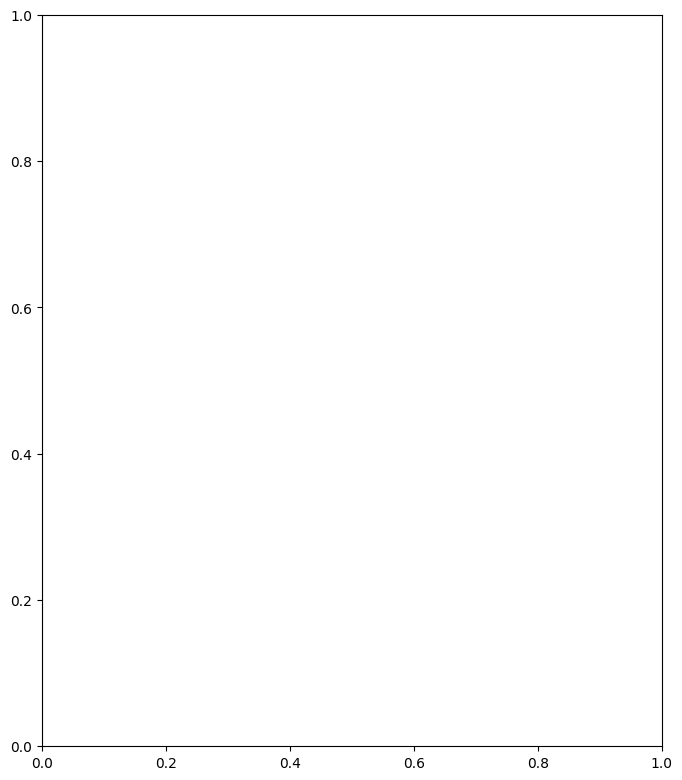

In [46]:
# 1,000개만 해석 (샘플링)
# X_test_sample = X_test.sample(n=100000, random_state=25989812)
# X_filtered = X_test_sample.loc[:, X_test_sample.nunique(dropna=False) > 1]
# X_test


# # SHAP 해석
# explainer = shap.LinearExplainer(model, X_filtered)
# shap_values = explainer(X_filtered)

# # 중요도 시각화
# shap.summary_plot(shap_values, X_filtered)


X_test_df = pd.DataFrame(X_test, columns=X.columns)  # X.columns는 학습용 컬럼
X_test_df1 = X_test_df.sample(n=1000, random_state=25989812)
explainer = shap.Explainer(model, X_test_df1)  # 또는 TreeExplainer
shap_values = explainer(X_test_df1)
shap.summary_plot(shap_values, X_test_df1)

#### (2) XGboost 활용한 모델 제작

##### 3번모델: xgboost로만 바뀜
1번모델과 데이터셋 활용 방식은 같음. 

모델만 logisticregression -> xgboost로 변경 

In [ ]:

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# XGBoost 모델 정의 및 학습
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# 모델 저장
joblib.dump(xgb_model, '../result/jiyoon/xgboost_model_1.pkl')

# 예측 및 평가
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
# => 성능 뚜렷히 개선됨. 

c:\Users\User\Desktop\workspace\HoduFanClub\20251R0136COSE47101\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:19:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[[918789   8483]
 [ 91066  45184]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95    927272
           1       0.84      0.33      0.48    136250

    accuracy                           0.91   1063522
   macro avg       0.88      0.66      0.71   1063522
weighted avg       0.90      0.91      0.89   1063522

ROC AUC: 0.8839582524403635


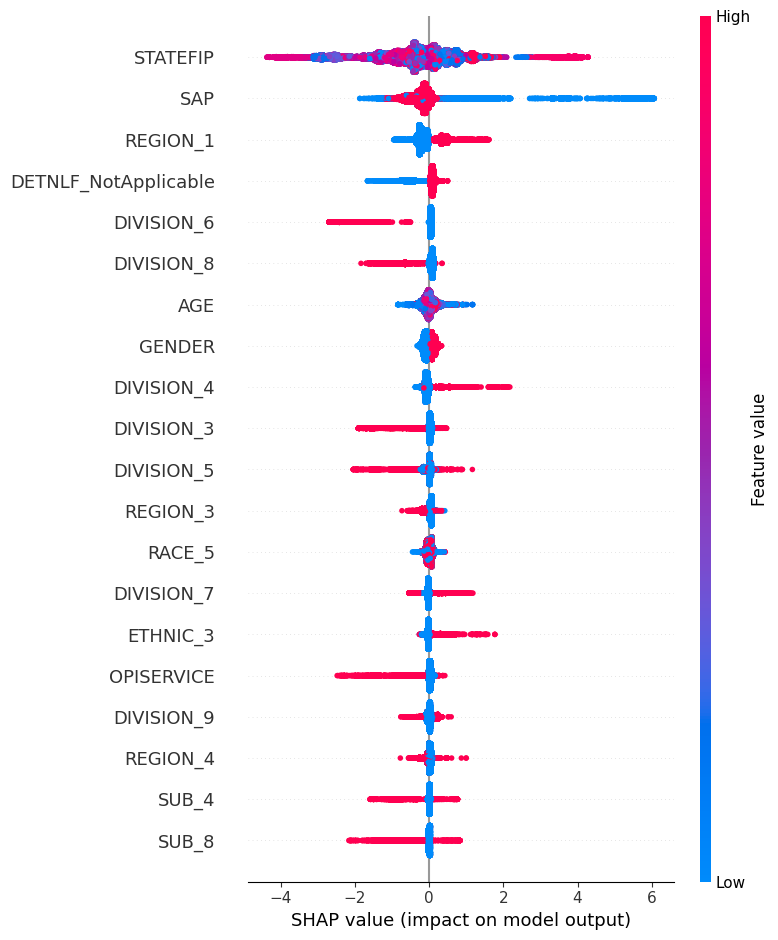

In [ ]:
# shap를 활용한 분석

X_test_sample = X_test.sample(n=100000, random_state=1)

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_sample)

# 요약 그래프 그리기
shap.summary_plot(shap_values, X_test_sample)

# => 결과 분석 및 더 자세한 방법을 이용한 분석이 필요할듯


##### 4번모델: 지역관련 변수 및 약물사용진단 변수 제거

너무 다양한 값을 가져 모델에 도움이 안 될 거 같은 변수 추가로 제거해봄. 

추가로 제거된 변수: STATEFIP, REGION_1.2.3.4, DIVISION_1.2...9, SUB_1.2...13 

In [ ]:
# NUMMHS로 이진 타겟 변수 만들기 => NUMMHS_binary
dataset6['NUMMHS_binary'] = dataset6['NUMMHS'].apply(lambda x: 1 if x == 0 else 0)

X = dataset6.drop(columns=[
    "YEAR", "CASEID",
    "NUMMHS", "NUMMHS_binary", "MH1", "MH2", "MH3", 
    "SMISED_2", "SMISED_3", 
    'TRAUSTREFLG', 'ANXIETYFLG', 'ADHDFLG', 'CONDUCTFLG', 'DELIRDEMFLG', 'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG', 'PDDFLG', 'PERSONFLG', 'SCHIZOFLG', 'ALCSUBFLG', 'OTHERDISFLG',
    'STATEFIP', 'REGION_1', 'REGION_2', 'REGION_3', 'REGION_4', 
    'SUB_1', 'SUB_2', 'SUB_3', 'SUB_4', 'SUB_5', 'SUB_6', 'SUB_7', 'SUB_8', 'SUB_9', 'SUB_10', 'SUB_11', 'SUB_12', 'SUB_13',
    'DIVISION_1', 'DIVISION_2', 'DIVISION_3', 'DIVISION_4', 'DIVISION_5', 'DIVISION_6', 'DIVISION_7', 'DIVISION_8', 'DIVISION_9'
    ])
y = dataset6["NUMMHS_binary"]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# XGBoost 모델 정의 및 학습
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

joblib.dump(xgb_model, '../result/jiyoon/xgboost_model_2.pkl')
# 예측 및 평가
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
# => 3번모델과 비교시 성능이 개선되지 않음. 오히려 하락... 1번 클래스를 예측하는 성능이 처참함.. 지역이 중요한 역할을 하는듯? 


c:\Users\User\Desktop\workspace\HoduFanClub\20251R0136COSE47101\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:45:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[[918457   8815]
 [118006  18244]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    927272
           1       0.67      0.13      0.22    136250

    accuracy                           0.88   1063522
   macro avg       0.78      0.56      0.58   1063522
weighted avg       0.86      0.88      0.84   1063522

ROC AUC: 0.7214595501366503


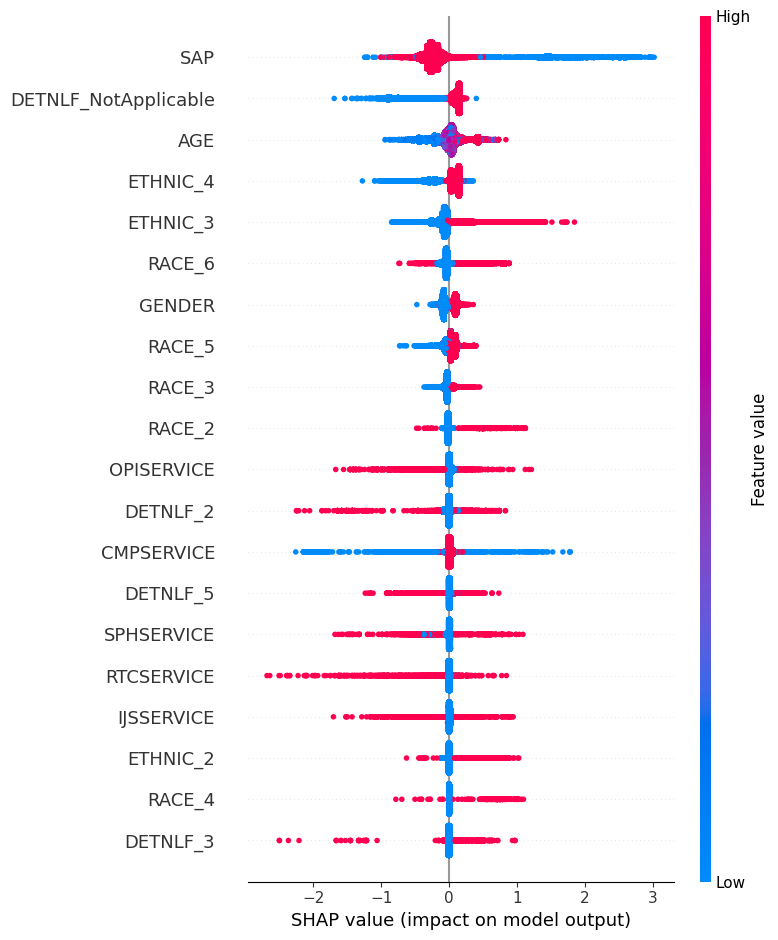

In [ ]:
# shap 분석

# 샘플을 줄여서 빠르게 해보기
X_test_sample = X_test.sample(n=100000, random_state=1)

# TreeExplainer는 트리 모델 전용이라 속도가 빠르고 정확함
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_sample)

# 요약 그래프 그리기
shap.summary_plot(shap_values, X_test_sample)

##### 5번모델: 전처리 데이터셋 대신 기본 데이터셋 사용

정규화, 원핫인코딩 등 전처리된 6번 데이터셋을 사용해왔는데, 대신 default 데이터셋을 사용. 

참고: 5번모델만 다른 데이터셋 쓰고, 그 외 모든 모델은 6번 데이터셋을 사용한다. 

In [ ]:
default = pd.read_csv(default_path)
default['NUMMHS_binary'] = default['NUMMHS'].apply(lambda x: 1 if x == 0 else 0)

X = default.drop(columns=[
    "YEAR", "CASEID",
    "NUMMHS", "NUMMHS_binary", "MH1", "MH2", "MH3", 
    "SMISED",
    'TRAUSTREFLG', 'ANXIETYFLG', 'ADHDFLG', 'CONDUCTFLG', 'DELIRDEMFLG', 'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG', 'PDDFLG', 'PERSONFLG', 'SCHIZOFLG', 'ALCSUBFLG', 'OTHERDISFLG',
    'STATEFIP'
    ])
y = default["NUMMHS_binary"]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# XGBoost 모델 정의 및 학습
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

joblib.dump(xgb_model, '../result/jiyoon/xgboost_model_3.pkl')
# 예측 및 평가
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

# => 3번모델과 비교시 성능 비슷함. 별반 차이가 없다. 

c:\Users\User\Desktop\workspace\HoduFanClub\20251R0136COSE47101\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:50:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[[1160496   19310]
 [ 137832   73946]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.94   1179806
           1       0.79      0.35      0.48    211778

    accuracy                           0.89   1391584
   macro avg       0.84      0.67      0.71   1391584
weighted avg       0.88      0.89      0.87   1391584

ROC AUC: 0.8806599429165984


##### 6번모델: 언더샘플링

0번 클래스와 1번 클래스 사이 비율이 크게 차이나는게 근본적 문제점 같아, 둘을 같은 비율로 맞춰주기 위해 수량이 많았던 0번 클래스에 언더샘플링 처리. 

In [ ]:
# 라벨 분리
df_0 = dataset6[dataset6["NUMMHS_binary"] == 0]
df_1 = dataset6[dataset6["NUMMHS_binary"] == 1]

# 1라벨 데이터 수만큼 0라벨에서 샘플링
df_0_under = df_0.sample(n=len(df_1), random_state=42)

# 합치기
balanced_df = pd.concat([df_0_under, df_1])

# 셔플 (순서 무작위화)
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

X = balanced_df.drop(columns=[
    "YEAR", "CASEID",
    "NUMMHS", "NUMMHS_binary", "MH1", "MH2", "MH3", 
    "SMISED_2", "SMISED_3", 
    'TRAUSTREFLG', 'ANXIETYFLG', 'ADHDFLG', 'CONDUCTFLG', 'DELIRDEMFLG', 'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG', 'PDDFLG', 'PERSONFLG', 'SCHIZOFLG', 'ALCSUBFLG', 'OTHERDISFLG'])
y = balanced_df["NUMMHS_binary"]


# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# XGBoost 모델 정의 및 학습
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

joblib.dump(xgb_model, '../result/jiyoon/xgboost_model_4.pkl')
# 예측 및 평가
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

# => 1번 클래스를 예측하는 성능이 개선. 대신 0번 클래스는 성능이 조금 떨어짐. 
# 주의점: test set까지 언더샘플링을 적용했으므로, 편향된 결과일 수 있다. 

c:\Users\User\Desktop\workspace\HoduFanClub\20251R0136COSE47101\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:53:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[[104085  32092]
 [ 24275 112134]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.79    136177
           1       0.78      0.82      0.80    136409

    accuracy                           0.79    272586
   macro avg       0.79      0.79      0.79    272586
weighted avg       0.79      0.79      0.79    272586

ROC AUC: 0.884315034213616


##### 7번모델: 언더샘플링-train에만 적용

위와 같은 기법. 그러나 결과를 보니 test 정확도가 의심되어, test데이터는 언더샘플링 하지 않고 그대로 둠. 

In [7]:
dataset6['NUMMHS_binary'] = dataset6['NUMMHS'].apply(lambda x: 1 if x == 0 else 0)

In [8]:
train_df, test_df = train_test_split(
    dataset6,
    test_size=0.2,
    stratify=dataset6["NUMMHS_binary"],  # 클래스 비율 유지
    random_state=42
)

# 클래스별 나누기
train_0 = train_df[train_df["NUMMHS_binary"] == 0]
train_1 = train_df[train_df["NUMMHS_binary"] == 1]

# 1과 같은 수로 0에서 샘플링
train_0_under = train_0.sample(n=len(train_1), random_state=42)

# 언더샘플된 학습 데이터
train_balanced = pd.concat([train_0_under, train_1]).sample(frac=1, random_state=42)

# 타겟
y_train = train_balanced["NUMMHS_binary"]
y_test = test_df["NUMMHS_binary"]

X_train = train_balanced.drop(columns=[
    "YEAR", "CASEID",
    "NUMMHS", "NUMMHS_binary", "MH1", "MH2", "MH3", 
    "SMISED_2", "SMISED_3", 
    'TRAUSTREFLG', 'ANXIETYFLG', 'ADHDFLG', 'CONDUCTFLG', 'DELIRDEMFLG', 'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG', 'PDDFLG', 'PERSONFLG', 'SCHIZOFLG', 'ALCSUBFLG', 'OTHERDISFLG'])
X_test = test_df.drop(columns=[
    "YEAR", "CASEID",
    "NUMMHS", "NUMMHS_binary", "MH1", "MH2", "MH3", 
    "SMISED_2", "SMISED_3", 
    'TRAUSTREFLG', 'ANXIETYFLG', 'ADHDFLG', 'CONDUCTFLG', 'DELIRDEMFLG', 'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG', 'PDDFLG', 'PERSONFLG', 'SCHIZOFLG', 'ALCSUBFLG', 'OTHERDISFLG'])


# XGBoost 모델 정의 및 학습
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

joblib.dump(xgb_model, '../result/jiyoon/xgboost_model_5.pkl')
# 예측 및 평가
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
# => 성능 괜찮은거같기도.. 

c:\Users\User\Desktop\workspace\HoduFanClub\20251R0136COSE47101\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:26:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[[709319 217910]
 [ 24778 111515]]
              precision    recall  f1-score   support

           0       0.97      0.76      0.85    927229
           1       0.34      0.82      0.48    136293

    accuracy                           0.77   1063522
   macro avg       0.65      0.79      0.67   1063522
weighted avg       0.89      0.77      0.81   1063522

ROC AUC: 0.8834830860675882


우리가 원하는 타겟인 1(정신질환없음)을 얼마나 잘 분류했는지 살펴 본 결과, 
precision = 0.34 로 꽤 낮았다. 모델이 정신질환이 없다고 예측한 행 중 실제로 정신질환이 없던 사람들이 34퍼센트. 
recall = 0.82로 꽤 높았다. 실제 정신질환이 없는 사람들 중 모델이 예측에 성공한 비율이 82퍼센트. 

#### (3) 결과 분석 및 모델 결정

(1), (2)에서 만든 모델의 결과를 비교해보자. 

1~6번 모델들은 precision이 높고, recall이 낮은 경향성이 있다. 

7번 모델은 반대로 precision이 낮고, recall이 높다. 


이는 7번모델이 실제 정신질환 없는 사람들을 잘 잡아낸다고 볼 수 있으며, 우리 분석의 목적인 “진단을 받지 않은 사람들, 그들은 진짜 질환이 없었을까? 아니면 위험군인데 누락된 걸까?”에 부합한다고 볼 수 있다. 

이에따라 언더샘플링+XGBoost 를 활용한 7번 모델을 최종모델로 선정. 해당 모델을 기반으로 분석을 조금 더 이어나가자. 

##### 목표
1. 진단을 받지 않은 사람들(예측값 1) 중, 어떤 변수들이 '1'이라고 판단되게 만들었는지 파악한다.
2. 특히 `True Positive`와 `False Negative`의 샘플들을 비교하여 어떤 특성 차이 때문에 예측이 엇갈렸는지를 분석한다.
3. SHAP을 활용하여 주요 변수의 영향력을 시각적으로 확인한다.


In [7]:
train_df, test_df = train_test_split(
    dataset6,
    test_size=0.2,
    stratify=dataset6["NUMMHS_binary"],  # 클래스 비율 유지
    random_state=42
)

# 클래스별 나누기
train_0 = train_df[train_df["NUMMHS_binary"] == 0]
train_1 = train_df[train_df["NUMMHS_binary"] == 1]

# 1과 같은 수로 0에서 샘플링
train_0_under = train_0.sample(n=len(train_1), random_state=42)

# 언더샘플된 학습 데이터
train_balanced = pd.concat([train_0_under, train_1]).sample(frac=1, random_state=42)

# 타겟
y_train = train_balanced["NUMMHS_binary"]
y_test = test_df["NUMMHS_binary"]

X_train = train_balanced.drop(columns=[
    "YEAR", "CASEID",
    "NUMMHS", "NUMMHS_binary", "MH1", "MH2", "MH3", 
    "SMISED_2", "SMISED_3", 
    'TRAUSTREFLG', 'ANXIETYFLG', 'ADHDFLG', 'CONDUCTFLG', 'DELIRDEMFLG', 'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG', 'PDDFLG', 'PERSONFLG', 'SCHIZOFLG', 'ALCSUBFLG', 'OTHERDISFLG'])
X_test = test_df.drop(columns=[
    "YEAR", "CASEID",
    "NUMMHS", "NUMMHS_binary", "MH1", "MH2", "MH3", 
    "SMISED_2", "SMISED_3", 
    'TRAUSTREFLG', 'ANXIETYFLG', 'ADHDFLG', 'CONDUCTFLG', 'DELIRDEMFLG', 'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG', 'PDDFLG', 'PERSONFLG', 'SCHIZOFLG', 'ALCSUBFLG', 'OTHERDISFLG'])


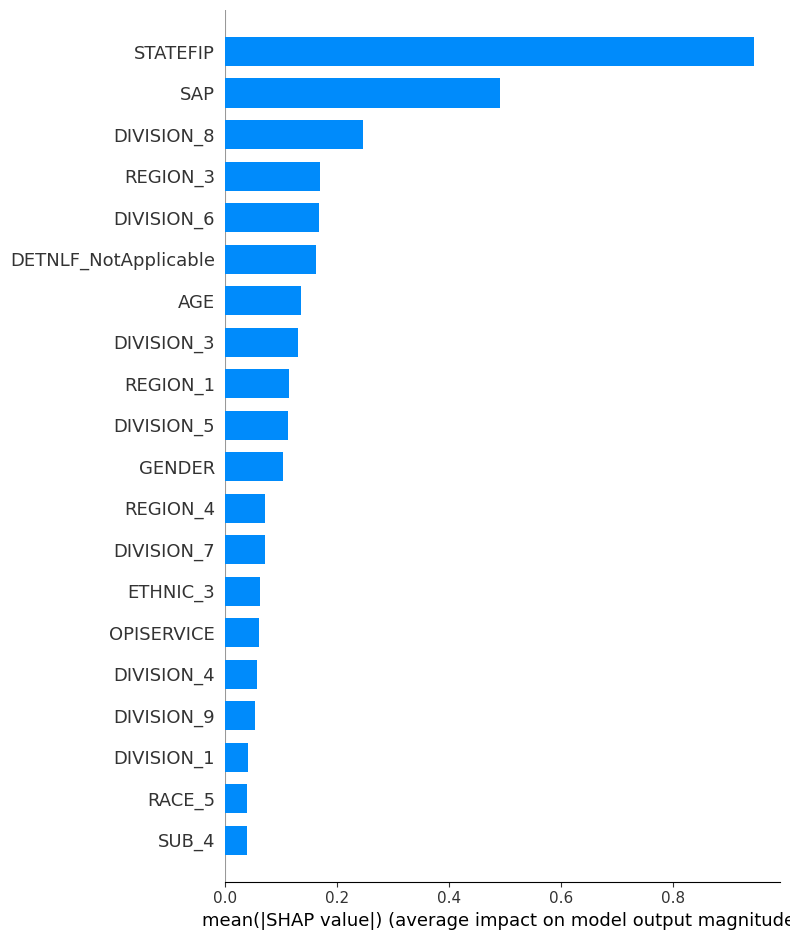

C:\Users\User\AppData\Local\Temp\ipykernel_7664\245218326.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_TP = X_test_df[TP_idx]
C:\Users\User\AppData\Local\Temp\ipykernel_7664\245218326.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_FN = X_test_df[FN_idx]


IndexError: boolean index did not match indexed array along axis 0; size of axis is 10000 but size of corresponding boolean axis is 1063522

In [ ]:
# 모델 로딩
xgb_model = joblib.load('../result/jiyoon/xgboost_model_5.pkl')

# SHAP explainer
explainer = shap.TreeExplainer(xgb_model)
X_test_sample = X_test.sample(n=10000, random_state=1)
shap_values = explainer.shap_values(X_test_df)

# 예측값
y_pred = xgb_model.predict(X_test_sample)
y_prob = xgb_model.predict_proba(X_test_sample)[:, 1]

# 1이라고 예측한 사람들 중 영향력 큰 변수 시각화
shap.summary_plot(shap_values, X_test_df, plot_type="bar")

# Confusion Matrix 기반 마스크 만들기
cm = confusion_matrix(y_test, y_pred)

TP_idx = (y_test == 1) & (y_pred == 1)
FN_idx = (y_test == 1) & (y_pred == 0)

X_TP = X_test_df[TP_idx]
X_FN = X_test_df[FN_idx]

# SHAP값도 필터링
shap_TP = shap_values[TP_idx]
shap_FN = shap_values[FN_idx]

# 각각 요약 그래프
print("✅ SHAP summary for True Positives (예측 1 맞춘 사람들)")
shap.summary_plot(shap_TP, X_TP)

print("✅ SHAP summary for False Negatives (예측 0 → 진짜는 1)")
shap.summary_plot(shap_FN, X_FN)


✅ 전체 샘플의 SHAP 변수 영향력 (bar plot)


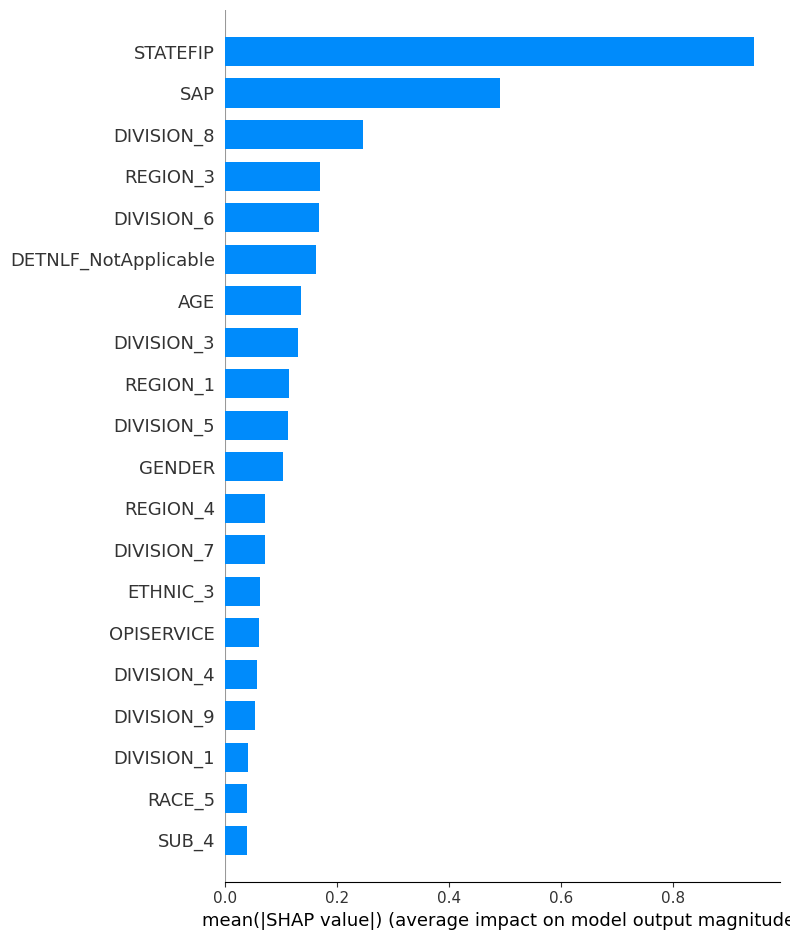

✅ SHAP summary for True Positives (예측 1 맞춘 사람들)


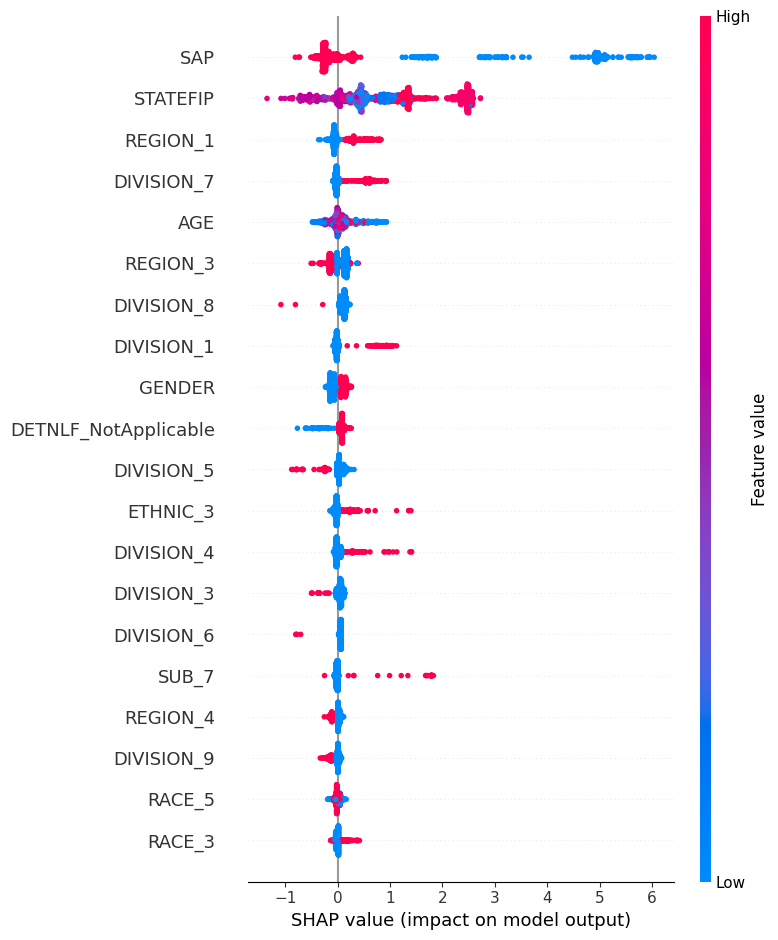

✅ SHAP summary for False Negatives (예측 0 → 실제는 1)


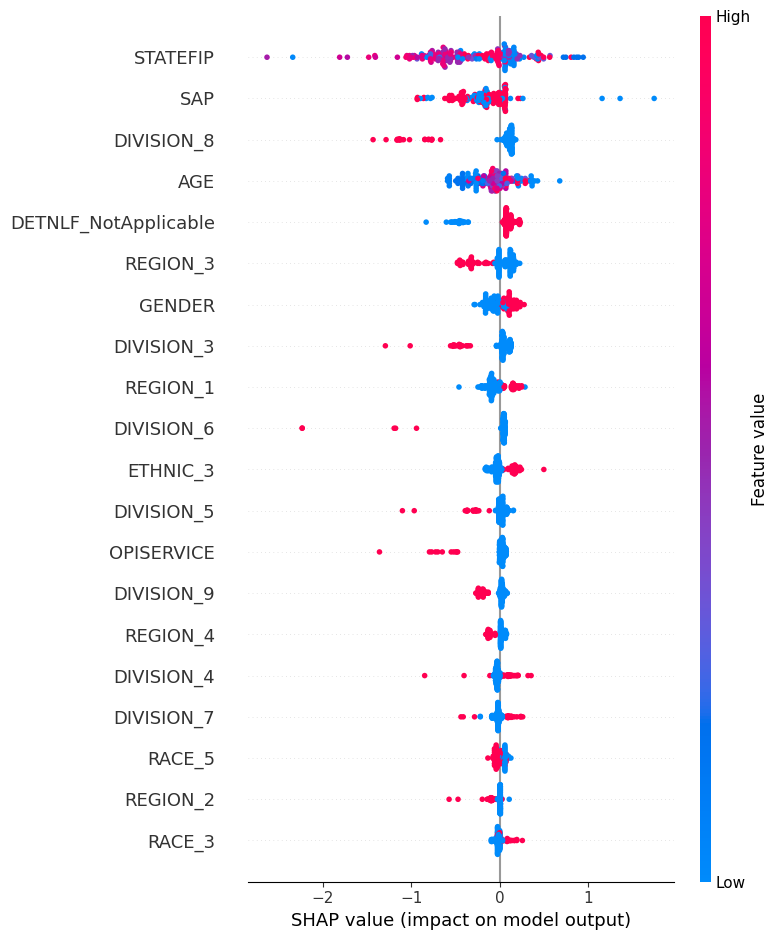

In [9]:
# 모델 로딩
xgb_model = joblib.load('../result/jiyoon/xgboost_model_5.pkl')

# SHAP explainer
explainer = shap.TreeExplainer(xgb_model)

# ❷ X_test에서 10,000개 샘플링 (SHAP용)
X_test_sample = X_test.sample(n=10000, random_state=1)
y_test_sample = y_test.loc[X_test_sample.index]

# ❸ SHAP Explainer 생성
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_sample)

# ❹ 예측 수행
y_pred_sample = xgb_model.predict(X_test_sample)
y_prob_sample = xgb_model.predict_proba(X_test_sample)[:, 1]

# ❺ 전체 샘플에 대한 변수 영향력 (bar plot)
print("✅ 전체 샘플의 SHAP 변수 영향력 (bar plot)")
shap.summary_plot(shap_values, X_test_sample, plot_type="bar")

# ❻ Confusion Matrix 기반 마스크 생성
TP_idx = (y_test_sample == 1) & (y_pred_sample == 1)
FN_idx = (y_test_sample == 1) & (y_pred_sample == 0)

# ❼ TP/FN 샘플 분리
X_TP = X_test_sample[TP_idx]
X_FN = X_test_sample[FN_idx]

shap_TP = shap_values[TP_idx]
shap_FN = shap_values[FN_idx]

# ❽ 각각 요약 그래프
print("✅ SHAP summary for True Positives (예측 1 맞춘 사람들)")
shap.summary_plot(shap_TP, X_TP)

print("✅ SHAP summary for False Negatives (예측 0 → 실제는 1)")
shap.summary_plot(shap_FN, X_FN)

##### SHAP 분석

---

**1. 전체 SHAP 분석 결과 요약**

모델이 예측을 수행할 때 어떤 변수들이 전반적으로 중요한 영향을 미쳤는지를 확인하기 위해 전체 테스트 샘플(10,000개)을 대상으로 SHAP summary plot을 생성하였다.

분석 결과, 모델의 예측에 가장 큰 영향을 준 변수는 다음과 같았다:

- **STATEFIP**: 클라이언트가 속한 주(state) 정보. 주마다 정책이나 보고 관행이 달라 예측에 큰 영향을 줌.
- **SAP**: 물질 사용 문제 여부. 모델은 이 변수를 매우 강하게 반영하여 판단함.
- **DIVISION_8**, **REGION_3**, **DIVISION_6** 등 지역 관련 변수들도 예측의 중요한 기준으로 작용.
- **AGE**, **GENDER**, **DETNLF_NotApplicable**(비경제활동자 사유 미적용) 등도 중간 수준 이상의 영향을 가짐.

이 결과는 모델이 **클라이언트의 지역적 특성, 물질 사용 이력, 연령, 성별 등**을 종합적으로 고려하여 진단 유무를 판단하고 있음을 보여준다.

---

**2. TP vs FN 비교 분석**

예측 성능의 한계를 살펴보기 위해, 다음 두 그룹에 대해 SHAP 값을 비교하였다:

- **True Positive (TP)**: 실제로 진단을 받지 않았고, 모델도 이를 정확히 1로 예측한 그룹
- **False Negative (FN)**: 실제로는 진단을 받았지만, 모델이 잘못 0이라고 예측한 그룹 (모델이 놓친 위험군)

**2-1. TP 그룹의 특징 (모델이 잘 예측한 경우)**

- **SAP 값이 낮거나 없음** → 모델이 “물질 사용 문제 없음”을 진단 없음의 강한 신호로 받아들임.
- **STATEFIP**는 특정 주에서 예측 일관성이 있었음.
- 전반적으로 SHAP 값의 분포가 넓고 명확히 한쪽 방향으로 치우쳐 있었음

**2-1. FN 그룹의 특징 (모델이 놓친 경우)**

- **SAP**가 있음에도 불구하고 모델이 진단이 없다고 예측함 → SAP 정보가 일부 샘플에서는 예측에 충분히 작용하지 않았음.
- SHAP 값들이 전체적으로 작고 0 주변에 몰려 있음 → 모델이 해당 샘플들에 대해 **확신이 없었고 모호한 판단**을 내렸음을 시사.
- `STATEFIP`, `AGE`, `DIVISION_8` 등의 변수는 여전히 중요하게 나타나지만, 방향성이나 강도가 약해짐.
- 즉, **모델이 학습한 일반적인 진단 예측 패턴에서 벗어난 경우들**이라고 볼 수 있음.

---

**3. 결론 및 시사점**

이번 SHAP 분석은 모델이 어떤 기준으로 "진단되지 않음"이라고 예측했는지를 구체적으로 설명해주었으며, 동시에 **모델이 놓친 고위험군(FN)**의 특징도 드러내 주었다.

- **모델은 SAP, STATEFIP, AGE 등의 변수에 강하게 의존**하여 진단 유무를 예측하고 있었다.
- 하지만 일부 FN 그룹에서는 이 변수들이 **예측에 충분히 작용하지 않거나**, **일반적인 조합이 아니었던 경우**, 모델이 진단 여부를 잘못 예측함.
- 이로부터, **모델은 현재 일반적인 위험군은 잘 예측하지만, 패턴이 다소 다른 비정형 사례에는 취약함**을 알 수 있다.

> 따라서 향후 분석에서는 FN에 해당하는 사례들에 대한 **군집 분석**, **특이 패턴 탐지**, 또는 **모델 구조 보완 (예: 앙상블, 계층적 분류 등)**이 필요할 수 있다.  
> 또한, SHAP 분석을 통해 확보한 변수 영향력 정보를 토대로 **설명 가능한 정책적 시사점** 도출이 가능하다. 예: 특정 주에서 진단 누락 비율이 높다면, 해당 주의 정책 또는 보고체계 점검 필요 등.

